### **Aishani Singh** 
### **GRIP June'21**


### **Task 01: Prediction using Supervised Machine Learning**

**● Predict the percentage of an student based on the no. of study hours.**

**● A simple linear regression task as it involves just 2 variables.**

# Importing libraries

In [61]:

import pandas as pd
import seaborn as sns
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
print("Required libraries imported")

Required libraries imported


# Reading csv file
**● Data can be found at http://bit.ly/w-data**

In [62]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported!")



Data imported!


# The Data Set

In [63]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [64]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [66]:
data.shape

(25, 2)

# Data Visualization (Plotting the distribution of scores)


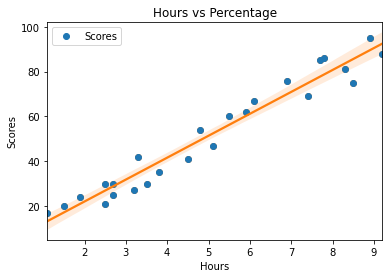

C:\Users\JSINGH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

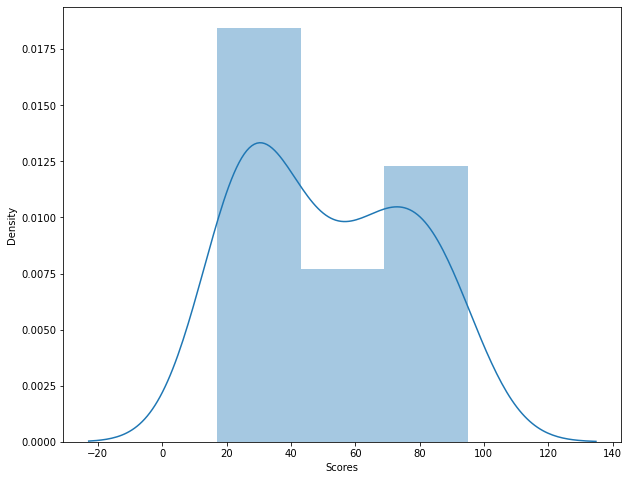

In [67]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.show()
plt.figure(figsize=(10,8))
plt.tight_layout()
sns.distplot(data['Scores'])

 There is a positive linear relation between the number of hours studied and percentage of score.

### **Spliting the data**



In [68]:
X = data.drop(columns='Scores')
y = data['Scores']
print('Shape of x =', X.shape)
print('Shape of y =', y.shape) 

Shape of x = (25, 1)
Shape of y = (25,)


###  Training the Model

In [69]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
print('Importing Done!')

Importing Done!


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### **Training the Algorithm**


In [71]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train.astype(float)).fit()
print('Regression Model is Ready')

Regression Model is Ready


In [72]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2111.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):                    6.12e-21
Time:                        16:57:44   Log-Likelihood:                         -62.925
No. Observations:                  20   AIC:                                      127.8
Df Residuals:                      19   BIC:                                      128.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### **Making Predictions**


In [73]:
y_pred = model.predict(X_test)


In [74]:
data_p = list(zip(y_test, y_pred))
df = pd.DataFrame(data_p, columns=['Actual', 'Predicted'])
df.head()


,Actual,Predicted
0,20,15.337585
1,27,32.720181
2,69,75.665418
3,30,25.562641
4,62,60.327833


### Graphical representation of Actual and Predicted results

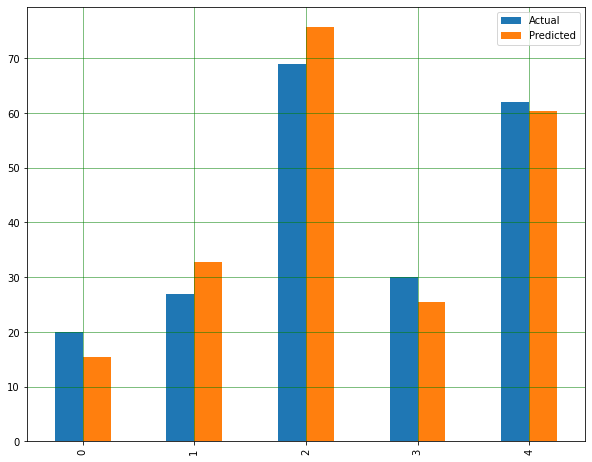

In [75]:
df1 = df.head()
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

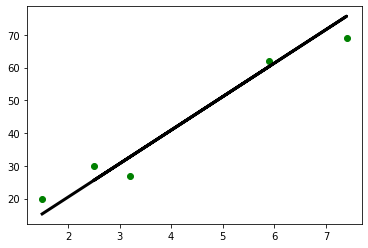

In [76]:
# Straight line with the test data
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.show()

### **Evaluating the Model**



In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.631507908193602
Mean Squared Error: 24.274535150727907
Root Mean Squared Error: 4.926919438221809


### Predictions for three values

In [81]:
print('Predicted Score for 9.25 Hours of Study =', model.predict(9.25))
print('Predicted Score for 7.81 Hours of Study =', model.predict(7.81))
print('Predicted Score for 8.0 Hours of Study =', model.predict(8.00))


Predicted Score for 9.25 Hours of Study = [94.58177251]
Predicted Score for 7.81 Hours of Study = [79.85769116]
Predicted Score for 8.0 Hours of Study = [81.8004519]
